# taxi time

## import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames
# Pretty display for notebooks
%matplotlib inline

## load the data

In [2]:
df = pd.read_csv("train.csv")

## explore the data

In [3]:
df.shape

(1458644, 11)

In [4]:
df.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
import gpxpy.geo
def cal_dis(x):
    dist = gpxpy.geo.haversine_distance(x['pickup_longitude'], x['pickup_latitude'],
                                        x['dropoff_longitude'],x['dropoff_latitude'])
    return dist    

In [6]:
df['dist'] = df.apply(cal_dis, axis=1)

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
df['dist'] = scaler.fit_transform(df['dist'])

/home/yanyan/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/yanyan/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [8]:
from datetime import datetime
datestring = df['pickup_datetime'][0]
dt = datetime.strptime(datestring, '%Y-%m-%d %H:%M:%S')
print dt.year, dt.month, dt.day

2016 3 14


In [9]:
def get_year( time_string):
    dt = datetime.strptime(time_string, '%Y-%m-%d %H:%M:%S')
    return dt.year    

In [10]:
def get_month( time_string):
    dt = datetime.strptime(time_string, '%Y-%m-%d %H:%M:%S')
    return str(dt.month)

In [11]:
def get_day( time_string):
    dt = datetime.strptime(time_string, '%Y-%m-%d %H:%M:%S')
    return dt.day

In [12]:
df['pickup_year'] = df['pickup_datetime'].apply(get_year)

In [13]:
np.unique(df['pickup_year'])

array([2016])

In [14]:
df['pickup_month'] = df['pickup_datetime'].apply(get_month)

In [15]:
np.unique(df.pickup_month)

array(['1', '2', '3', '4', '5', '6'], dtype=object)

In [16]:
df['pickup_day'] = df['pickup_datetime'].apply(get_day)

In [17]:
datetime.strptime(df['pickup_datetime'][100], '%Y-%m-%d %H:%M:%S').strftime('%A')

'Wednesday'

In [18]:
def get_week_day( time_string):
    week_day = datetime.strptime(time_string, '%Y-%m-%d %H:%M:%S').strftime('%A')
    return week_day

In [19]:
df['pickup_week_day'] = df['pickup_datetime'].apply(get_week_day)

In [20]:
df['pickup_day'].head(5)

0    14
1    12
2    19
3     6
4    26
Name: pickup_day, dtype: int64

In [21]:
def get_hour( time_string):
    time = datetime.strptime(time_string, '%Y-%m-%d %H:%M:%S')
    return str(time.hour)

In [22]:
df['pickup_hour'] = df['pickup_datetime'].apply(get_hour)

In [23]:
df_small = df[['vendor_id','passenger_count','trip_duration']]

In [24]:
np.unique(df_small.vendor_id)

array([1, 2])

In [25]:
np.unique(df_small.passenger_count)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

{'boxes': [<matplotlib.lines.Line2D at 0x7f1f1ab2b8d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1ea8840c90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1ea8853f90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1ea8853950>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1ea88aef50>,
  <matplotlib.lines.Line2D at 0x7f1ea8840650>]}

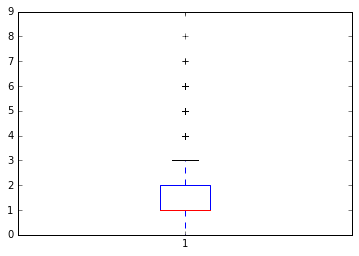

In [26]:
plt.boxplot(df_small['passenger_count'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f1f181a9a50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1ea8787e10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1ea879e150>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1ea8793ad0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1ea8787110>,
  <matplotlib.lines.Line2D at 0x7f1ea87877d0>]}

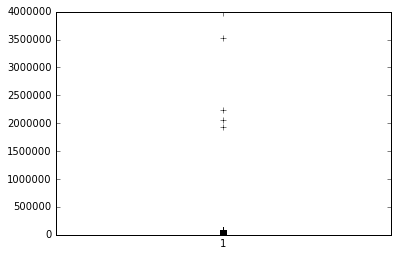

In [27]:
plt.boxplot(df_small['trip_duration'])


(array([  1.45658900e+06,   7.00000000e+01,   5.00000000e+01,
          1.93100000e+03,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

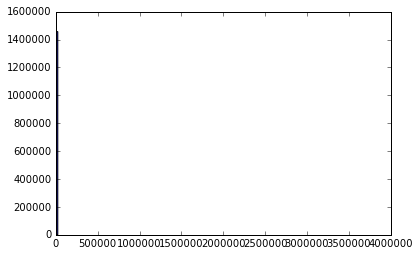

In [28]:
plt.hist(df_small['trip_duration'], bins =150)

In [29]:
df_small['trip_duration'].describe()

count    1.458644e+06
mean     9.594923e+02
std      5.237432e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

In [30]:
trip_duration_q2=np.percentile(df_small.trip_duration.values,2)

In [31]:
trip_duration_q98=np.percentile(df_small.trip_duration.values,98)

In [32]:
df_small_wo_outlier = df_small [ np.logical_and (df_small.trip_duration >trip_duration_q2 
          , df_small.trip_duration <trip_duration_q98)]

(array([ 11382.,  13370.,  16056.,  17768.,  19593.,  21454.,  22391.,
         24362.,  24697.,  25755.,  25772.,  26745.,  26681.,  27271.,
         26818.,  26806.,  27118.,  26541.,  26568.,  26037.,  25909.,
         25269.,  24972.,  24646.,  24210.,  23620.,  23155.,  22657.,
         22037.,  21524.,  22301.,  20564.,  20058.,  19620.,  18860.,
         18596.,  17850.,  17431.,  17103.,  16474.,  16301.,  15565.,
         15473.,  14804.,  14213.,  13931.,  13486.,  13225.,  12777.,
         12090.,  11886.,  11555.,  11205.,  10598.,  10452.,  10183.,
          9857.,   9824.,   9244.,   9025.,   9164.,   8523.,   8018.,
          7931.,   7651.,   7347.,   7040.,   6888.,   6822.,   6395.,
          6413.,   6151.,   5902.,   5693.,   5574.,   5497.,   5203.,
          5126.,   4941.,   4795.,   4569.,   4393.,   4305.,   4080.,
          4072.,   3710.,   3709.,   3650.,   3593.,   3670.,   3287.,
          3180.,   3109.,   2960.,   2925.,   2880.,   2795.,   2666.,
      

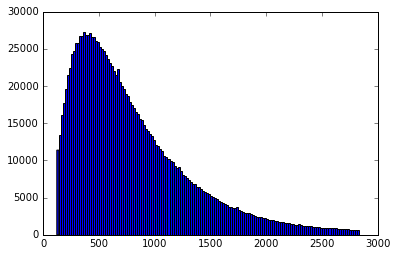

In [33]:
plt.hist(df_small_wo_outlier['trip_duration'], bins =150)

(array([  1659.,   1647.,   1142.,   1818.,   2007.,   1824.,   1976.,
          2065.,   2131.,   2247.,   2244.,   3195.,   2449.,   2530.,
          3531.,   2763.,   3625.,   3761.,   2974.,   4015.,   3862.,
          4034.,   4216.,   5475.,   4350.,   4291.,   5820.,   4743.,
          5989.,   6054.,   6050.,   6146.,   6283.,   6389.,   6643.,
          8227.,   6806.,   8023.,   6980.,   8300.,   8516.,   8516.,
         10058.,   8629.,   9937.,   8660.,  10517.,  10288.,  10129.,
         10494.,  11998.,  10620.,  12182.,  12032.,  11889.,  11800.,
         11947.,  13401.,  13705.,  13354.,  13323.,  13397.,  13201.,
         14670.,  14513.,  14471.,  14282.,  15598.,  15289.,  15409.,
         15241.,  14906.,  16301.,  15959.,  15819.,  16722.,  15348.,
         16218.,  17197.,  15597.,  16755.,  16313.,  17057.,  15912.,
         16410.,  17267.,  15681.,  16354.,  16867.,  15526.,  16126.,
         16620.,  16252.,  15862.,  15351.,  15801.,  15826.,  14691.,
      

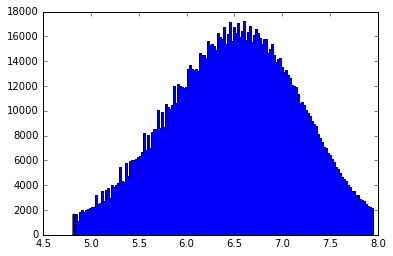

In [34]:
plt.hist(np.log(df_small_wo_outlier['trip_duration'].values), bins =150)

In [35]:
np.unique(df.store_and_fwd_flag)

array(['N', 'Y'], dtype=object)

In [36]:
df[df['store_and_fwd_flag']=="Y"].trip_duration.describe()

count    8045.000000
mean     1080.763331
std       925.645317
min         2.000000
25%       455.000000
50%       812.000000
75%      1400.000000
max      9984.000000
Name: trip_duration, dtype: float64

(array([  4.82600000e+03,   2.13500000e+03,   6.95000000e+02,
          2.51000000e+02,   9.20000000e+01,   3.30000000e+01,
          1.00000000e+01,   2.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  2.00000000e+00,   1.00020000e+03,   1.99840000e+03,
          2.99660000e+03,   3.99480000e+03,   4.99300000e+03,
          5.99120000e+03,   6.98940000e+03,   7.98760000e+03,
          8.98580000e+03,   9.98400000e+03]),
 <a list of 10 Patch objects>)

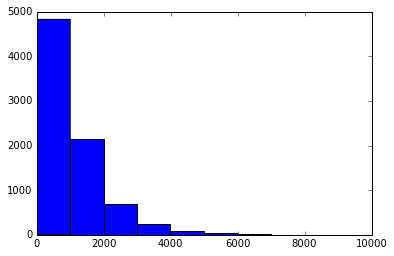

In [37]:
plt.hist(df[df['store_and_fwd_flag']=="Y"].trip_duration)

In [38]:
df[df['store_and_fwd_flag']=="N"].trip_duration.describe()

count    1.450599e+06
mean     9.588197e+02
std      5.251475e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.074000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

In [39]:
df.columns

Index([u'id', u'vendor_id', u'pickup_datetime', u'dropoff_datetime',
       u'passenger_count', u'pickup_longitude', u'pickup_latitude',
       u'dropoff_longitude', u'dropoff_latitude', u'store_and_fwd_flag',
       u'trip_duration', u'dist', u'pickup_year', u'pickup_month',
       u'pickup_day', u'pickup_week_day', u'pickup_hour'],
      dtype='object')

In [40]:
df_selected = df[ np.logical_and (df_small.trip_duration >trip_duration_q2 
          , df_small.trip_duration <trip_duration_q98)]

In [41]:
df_selected = df_selected[['vendor_id','passenger_count',
                  'store_and_fwd_flag','pickup_month','pickup_day', 'pickup_hour',
                  'pickup_week_day','trip_duration','dist']]

In [42]:
feature = df_selected[['vendor_id','passenger_count',
                  'store_and_fwd_flag','pickup_month','pickup_hour',
                  'pickup_week_day','dist']]

In [43]:
df_selected_200 = df_selected[:200]

:0: FutureWarning: IPython widgets are experimental and may change in the future.


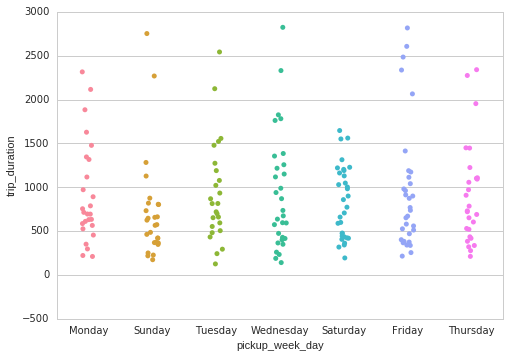

In [44]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.stripplot(x="pickup_week_day", y="trip_duration", data=df_selected_200, jitter=True)

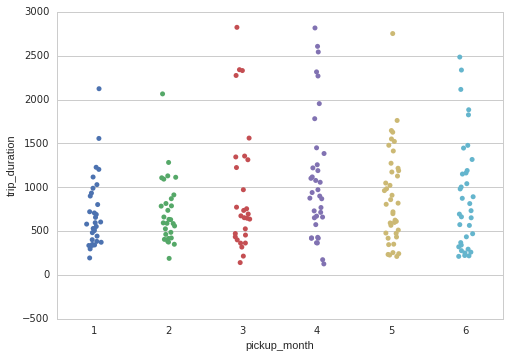

In [45]:
sns.stripplot(x="pickup_month", y="trip_duration", data=df_selected_200,  jitter=True)

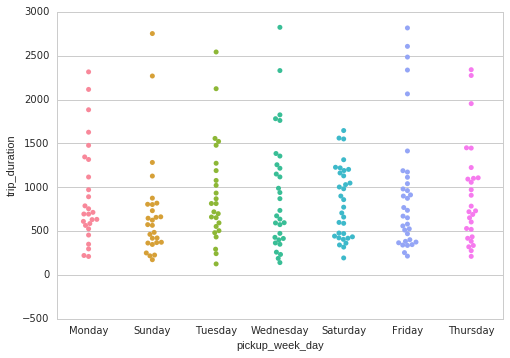

In [46]:
sns.swarmplot(x="pickup_week_day", y="trip_duration", data=df_selected_200)

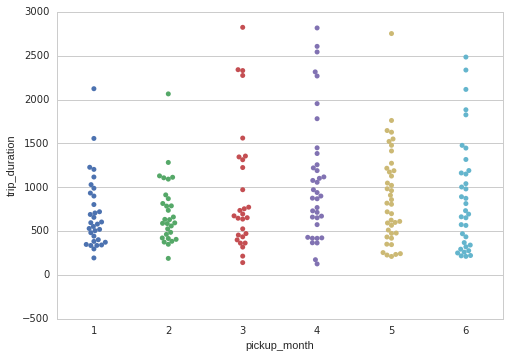

In [47]:
sns.swarmplot(x="pickup_month", y="trip_duration", data=df_selected_200)

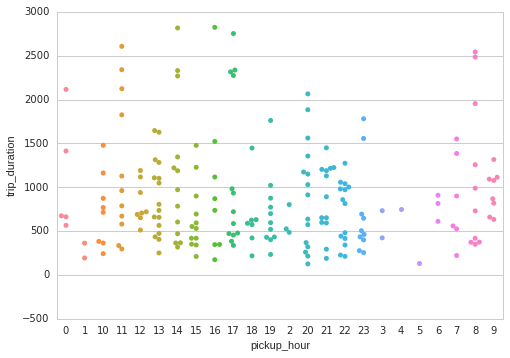

In [48]:
sns.swarmplot(x="pickup_hour", y="trip_duration", data=df_selected_200)

In [49]:
X= pd.get_dummies(feature)

In [50]:
X.head(5)

,vendor_id,passenger_count,dist,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_month_1,pickup_month_2,pickup_month_3,pickup_month_4,pickup_month_5,...,pickup_hour_7,pickup_hour_8,pickup_hour_9,pickup_week_day_Friday,pickup_week_day_Monday,pickup_week_day_Saturday,pickup_week_day_Sunday,pickup_week_day_Thursday,pickup_week_day_Tuesday,pickup_week_day_Wednesday
0,2,1,0.002289,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0.002503,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2,1,0.003943,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2,1,0.000558,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,2,1,0.000386,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [51]:
X.shape

(1400060, 42)

In [52]:
y = df_selected.trip_duration

In [53]:
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)
# Show the results of the split
print X_train.shape
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

(1120048, 42)
Training set has 1120048 samples.
Testing set has 280012 samples.


/home/yanyan/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [54]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)    
    
    # Return the score
    return score

In [55]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.cross_validation import ShuffleSplit

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': range(1,11)}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric, greater_is_better=True, 
                              needs_proba=False, needs_threshold=False)
    

    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 
    #'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.   
 
    grid= GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)        

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [56]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 10 for the optimal model.


In [57]:
score = performance_metric(y_test, reg.predict(X_test))
print score

0.497043271355


In [108]:
reg.feature_importances_

array([  4.75014363e-05,   2.17232083e-04,   9.44947220e-01,
         7.92288414e-06,   9.63374458e-06,   1.21382518e-04,
         1.08396684e-04,   6.36171384e-05,   3.75042697e-05,
         1.86651890e-04,   1.35781296e-04,   2.39590260e-03,
         2.99887188e-03,   6.31952256e-05,   1.39229425e-04,
         0.00000000e+00,   0.00000000e+00,   1.03041922e-03,
         1.82696183e-03,   1.75021734e-03,   1.71559168e-03,
         1.31223685e-03,   2.32963885e-04,   6.48829817e-04,
         3.08018605e-06,   4.31437803e-04,   0.00000000e+00,
         9.17478091e-04,   1.09018918e-03,   2.26270101e-03,
         6.69973860e-03,   9.15699299e-03,   2.68872193e-03,
         4.76802524e-04,   3.30072808e-04,   9.39033420e-05,
         1.98754699e-03,   3.77151277e-03,   9.99572266e-03,
         3.39498904e-05,   3.03730407e-05,   3.25122237e-05])

In [113]:
X_test.columns

Index([u'vendor_id', u'passenger_count', u'dist', u'store_and_fwd_flag_N',
       u'store_and_fwd_flag_Y', u'pickup_month_1', u'pickup_month_2',
       u'pickup_month_3', u'pickup_month_4', u'pickup_month_5',
       u'pickup_month_6', u'pickup_hour_0', u'pickup_hour_1',
       u'pickup_hour_10', u'pickup_hour_11', u'pickup_hour_12',
       u'pickup_hour_13', u'pickup_hour_14', u'pickup_hour_15',
       u'pickup_hour_16', u'pickup_hour_17', u'pickup_hour_18',
       u'pickup_hour_19', u'pickup_hour_2', u'pickup_hour_20',
       u'pickup_hour_21', u'pickup_hour_22', u'pickup_hour_23',
       u'pickup_hour_3', u'pickup_hour_4', u'pickup_hour_5', u'pickup_hour_6',
       u'pickup_hour_7', u'pickup_hour_8', u'pickup_hour_9',
       u'pickup_week_day_Friday', u'pickup_week_day_Monday',
       u'pickup_week_day_Saturday', u'pickup_week_day_Sunday',
       u'pickup_week_day_Thursday', u'pickup_week_day_Tuesday',
       u'pickup_week_day_Wednesday'],
      dtype='object')

Feature ranking:
1. feature 2 (0.944947)
2. feature 38 (0.009996)
3. feature 31 (0.009157)
4. feature 30 (0.006700)
5. feature 37 (0.003772)


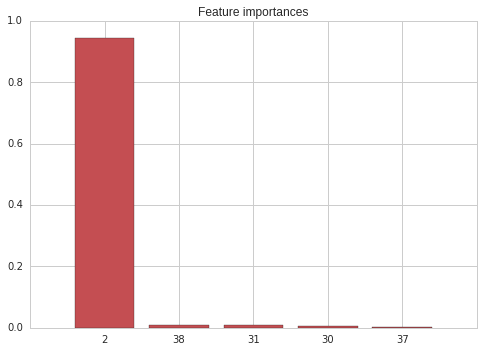

In [112]:
importances = reg.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(5):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(5), importances[indices][:5],
       color="r",  align="center")
plt.xticks(range(5), indices[:5])
plt.xlim([-1, 5])
plt.show()

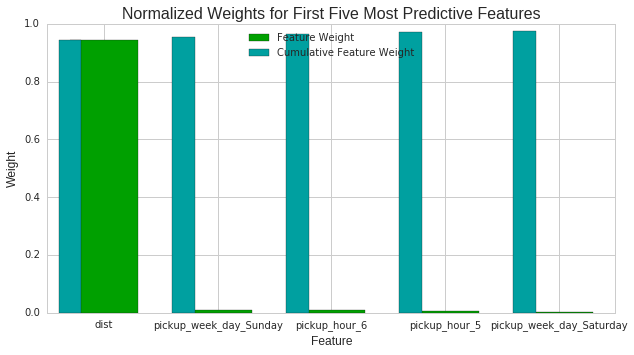

In [115]:
import visuals as vs
#http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
from sklearn.ensemble import ExtraTreesClassifier


# TODO: Extract the feature importances using .feature_importances_ 
importances = reg.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

# test 

In [58]:
df_test = pd.read_csv("test.csv")

In [59]:
df_test.columns

Index([u'id', u'vendor_id', u'pickup_datetime', u'passenger_count',
       u'pickup_longitude', u'pickup_latitude', u'dropoff_longitude',
       u'dropoff_latitude', u'store_and_fwd_flag'],
      dtype='object')

In [60]:
df_test['pickup_month'] = df_test['pickup_datetime'].apply(get_month)
df_test['pickup_week_day'] = df_test['pickup_datetime'].apply(get_week_day)
df_test['pickup_hour'] = df_test['pickup_datetime'].apply(get_hour)

In [61]:
df_test['dist'] = df_test.apply(cal_dis, axis=1)
scaler = MinMaxScaler() # default=(0, 1)

df_test['dist'] = scaler.fit_transform(df_test['dist'])

/home/yanyan/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/yanyan/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [62]:
feature_test = df_test[['vendor_id','passenger_count',
                  'store_and_fwd_flag','pickup_month','pickup_hour',
                  'pickup_week_day','dist']]

In [63]:
# df_test.columns

In [64]:
df_test_dum= pd.get_dummies(feature_test)

In [65]:
# pred = reg.predict(df_test_dum).astype(int)

In [66]:
# result_df = pd.DataFrame({"trip_duration":pred}, index = df_test['id'])

In [67]:
# result_df.head(100)

In [68]:
# result_df.to_csv("result1.csv")

##used  RandomForestRegressor

In [97]:
from sklearn.ensemble import RandomForestRegressor

In [98]:
regr = RandomForestRegressor(max_depth=2, random_state=0)

In [99]:
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [100]:
pred = regr.predict(df_test_dum).astype(int)

In [101]:
score = performance_metric(y_test, regr.predict(X_test))
print score

0.443821285565


In [102]:
result_df = pd.DataFrame({"trip_duration":pred}, index = df_test['id'])

In [103]:
result_df.to_csv("result2.csv")

# linear regression

In [76]:
from sklearn.linear_model import Ridge

In [77]:
clf = Ridge(alpha=0.5)

In [78]:
regr=clf.fit(X_train, y_train)

In [79]:
pred = regr.predict(df_test_dum).astype(int)

In [80]:
score = performance_metric(y_test, regr.predict(X_test))
print score

0.338899198341


In [81]:
result_df = pd.DataFrame({"trip_duration":pred}, index = df_test['id'])

In [82]:
result_df.to_csv("result3.csv")

#nearest neighbour

In [83]:
full = X_train.copy()
full['trip_duration'] = y_train

In [84]:
full.corr()

,vendor_id,passenger_count,dist,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_month_1,pickup_month_2,pickup_month_3,pickup_month_4,pickup_month_5,...,pickup_hour_8,pickup_hour_9,pickup_week_day_Friday,pickup_week_day_Monday,pickup_week_day_Saturday,pickup_week_day_Sunday,pickup_week_day_Thursday,pickup_week_day_Tuesday,pickup_week_day_Wednesday,trip_duration
vendor_id,1.000000,0.287903,0.005024,0.077972,-0.077972,0.003800,0.002471,0.001273,-0.002201,-0.001790,...,0.000362,0.002393,-0.001254,-0.000871,0.000845,0.002829,-0.001866,0.002119,-0.001698,0.003241
passenger_count,0.287903,1.000000,0.005902,0.021507,-0.021507,0.002979,-0.000846,-0.000769,0.001244,-0.001056,...,-0.010434,-0.006963,-0.000652,-0.009904,0.021726,0.016622,-0.009074,-0.009162,-0.010086,0.011499
dist,0.005024,0.005902,1.000000,-0.023925,0.023925,0.000159,-0.003027,0.002434,-0.002336,0.003136,...,-0.021132,-0.019851,-0.009388,0.017119,-0.007927,0.033013,-0.009279,-0.008553,-0.012774,0.613865
store_and_fwd_flag_N,0.077972,0.021507,-0.023925,1.000000,-1.000000,-0.001757,0.000215,0.001956,-0.000473,0.000981,...,0.000952,0.000377,-0.000629,-0.002419,0.002584,0.002763,-0.001160,-0.000376,-0.000839,-0.021150
store_and_fwd_flag_Y,-0.077972,-0.021507,0.023925,-1.000000,1.000000,0.001757,-0.000215,-0.001956,0.000473,-0.000981,...,-0.000952,-0.000377,0.000629,0.002419,-0.002584,-0.002763,0.001160,0.000376,0.000839,0.021150
pickup_month_1,0.003800,0.002979,0.000159,-0.001757,0.001757,1.000000,-0.192499,-0.200637,-0.198067,-0.195860,...,-0.001949,-0.003000,0.033805,-0.014882,0.000103,0.010287,-0.010357,-0.011119,-0.009107,-0.028690
pickup_month_2,0.002471,-0.000846,-0.003027,0.000215,-0.000215,-0.192499,1.000000,-0.205141,-0.202514,-0.200257,...,0.001338,0.000394,-0.005913,0.031019,0.000869,-0.000597,-0.004397,-0.010703,-0.008775,-0.024756
pickup_month_3,0.001273,-0.000769,0.002434,0.001956,-0.001956,-0.200637,-0.205141,1.000000,-0.211075,-0.208722,...,0.002403,-0.001661,-0.017842,-0.016114,-0.011275,-0.016583,0.020832,0.019298,0.021148,-0.009892
pickup_month_4,-0.002201,0.001244,-0.002336,-0.000473,0.000473,-0.198067,-0.202514,-0.211075,1.000000,-0.206050,...,-0.001276,0.001260,0.026210,-0.013234,0.038798,-0.006998,-0.017772,-0.013332,-0.016079,0.010684
pickup_month_5,-0.001790,-0.001056,0.003136,0.000981,-0.000981,-0.195860,-0.200257,-0.208722,-0.206050,1.000000,...,-0.002666,0.000143,-0.021248,0.020116,-0.015145,0.028648,-0.017721,0.025548,-0.016918,0.024732


In [85]:
# from sklearn.neighbors import KNeighborsRegressor
# neigh = KNeighborsRegressor(n_neighbors=2)
# neigh.fit(X_train, y_train) 
# pred = neigh.predict(X_test).astype(int)

In [86]:
# score = performance_metric(y_test, regr.predict(X_test))
# print score

In [87]:

# result_df = pd.DataFrame({"trip_duration":pred}, index = df_test['id'])
# result_df.to_csv("result4.csv")

# nearest centroid

In [88]:
# from sklearn.neighbors.nearest_centroid import NearestCentroid

In [89]:
# centroid = NearestCentroid()
# centroid.fit(X_train, y_train) 
# pred = centroid.predict(df_test_dum).astype(int)

MemoryError: 

In [ ]:
score = performance_metric(y_test, regr.predict(X_test))
print score

In [ ]:
result_df = pd.DataFrame({"trip_duration":pred}, index = df_test['id'])
result_df.to_csv("result5.csv")

#lesso 

In [91]:
from sklearn import linear_model

In [92]:
clf = linear_model.Lasso(alpha=0.1)

In [94]:
clf.fit(X_train, y_train) 

print(clf.coef_)


[ -2.57693495e+00   3.68404729e+00   6.97500562e+04  -2.42640995e+01
   2.68010558e-13  -4.88272924e+01  -4.05304892e+01  -2.97385795e+01
   1.48212892e-02   1.58324840e+01   1.75119148e+01  -2.60072875e+01
  -5.61976572e+01   6.36326305e+01   8.24094369e+01   8.73002057e+01
   8.34003387e+01   9.75941806e+01   1.00438667e+02   8.30171738e+01
   8.95674144e+01   6.99195624e+01   1.50707945e+01  -6.63741279e+01
  -2.35419771e+01  -2.22190397e+01  -6.61188916e+00  -1.53554964e+01
  -8.78441578e+01  -1.36123909e+02  -2.51017238e+02  -2.16930282e+02
  -7.76317947e+01   3.11506567e+01   5.97067944e+01   9.94103362e+00
  -6.50062159e+01  -4.16904871e+01  -1.00161984e+02   3.06358509e+01
   0.00000000e+00   1.95553224e+01]


In [96]:
pred = clf.predict(df_test_dum).astype(int)
score = performance_metric(y_test, regr.predict(X_test))
print score

0.338899198341


In [ ]:
result_df = pd.DataFrame({"trip_duration":pred}, index = df_test['id'])
result_df.to_csv("result5.csv")

#GradientBoostingRegressor


In [105]:
from sklearn.ensemble import GradientBoostingRegressor

In [106]:
alpha = 0.95
clf = GradientBoostingRegressor(loss='quantile', alpha=alpha,
                                n_estimators=250, max_depth=3,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)
clf.fit(X_train, y_train) 

GradientBoostingRegressor(alpha=0.95, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=9,
             min_samples_split=9, min_weight_fraction_leaf=0.0,
             n_estimators=250, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [107]:
pred = clf.predict(df_test_dum).astype(int)
score = performance_metric(y_test, regr.predict(X_test))
print score

0.443821285565
